# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Nosso objetivo é criar um sistema para prever a renda de pessoas com base em algumas informações disponíveis. Esse desenvolvimento será feito pelo Cientista de Dados, dispondo de ferramentas como o Jupyter Notebook e bibliotecas do Python para tratamento e análise de dados (ex: Pandas, Streamlit, Matplotlib e Seaborn). Como a base de dados é relativamente pequena, não será necessário o uso de grande poder de processamento e, portanto, tudo poderá ser executado em um computador local.


## Etapa 2 Crisp-DM: Entendimento dos dados
Para atingir nosso objetivo, será feito o uso da base de dados 'previsao_de_renda.csv' que dispõe de informações valiosas e de grande relevância para a criação da árvore de decisão.


### Dicionário de dados

Aqui temos listados as nossas variáveis disponíveis e seus metadados.


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data da informação                                      | object|
| id_cliente              |  Identificador do cliente                                      | int64|
| sexo                    |  Gênero                                      | object|
| posse_de_veiculo        |  Possui carro                                      | bool|
| posse_de_imovel         |  Possui casa                                     | bool|
| qtd_filhos              |  Quantidade de filhos                                      | int64|
| tipo_renda              |  Tipo de renda                                      | object|
| educacao                |  Nível de escolaridade                                      | object|
| estado_civil            |  Estado civil                                      | object|
| tipo_residencia         |  Tipo de residência                                      | object|
| idade                   |  Idade                                      | int64|
| tempo_emprego           |  Tempo de emprego                                      | float64|
| qt_pessoas_residencia   |  Quantidade de moradores na mesma residência                                      | float64|
| renda                   |  Renda                                      | float64|





### Carregando os pacotes

In [3]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from ydata_profiling import ProfileReport

C:\Users\Tauan\anaconda3\envs\Streamlit\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Carregando os dados

In [4]:
dados = pd.read_csv('./input/previsao_de_renda.csv')

In [37]:
dados.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


### Entendimento dos dados - Univariada
> Nesta etapa avaliamos a distribuição de todas as variáveis. 

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [5]:
prof = ProfileReport(dados, explorative=True, minimal=True)


In [6]:
prof.to_file('./output/renda_analisys.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




> Aqui faremos a análise entre dois ou mais tipos de dados.

#### Idade x Renda

É possível observar  um significativo crescimento da renda com o avanço da idade, isso até os 40 anos. Depois acontece uma estagnação dos valores médios até os 60 anos.

<Axes: xlabel='idade', ylabel='renda'>

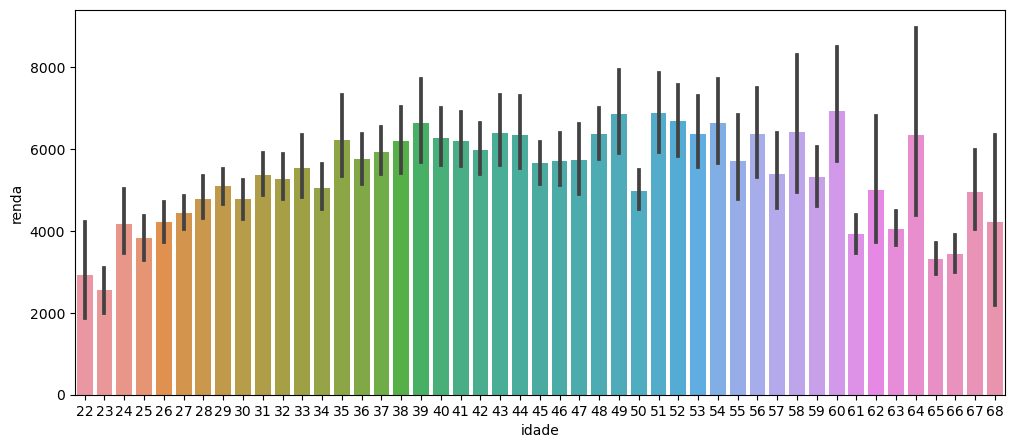

In [3]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='idade'
            ,y='renda'
            ,data=dados
            ,ax=ax)

#### Educação x Renda

A educação não aparenta ser um fator de grande peso para a renda. 

<Axes: xlabel='educacao', ylabel='renda'>

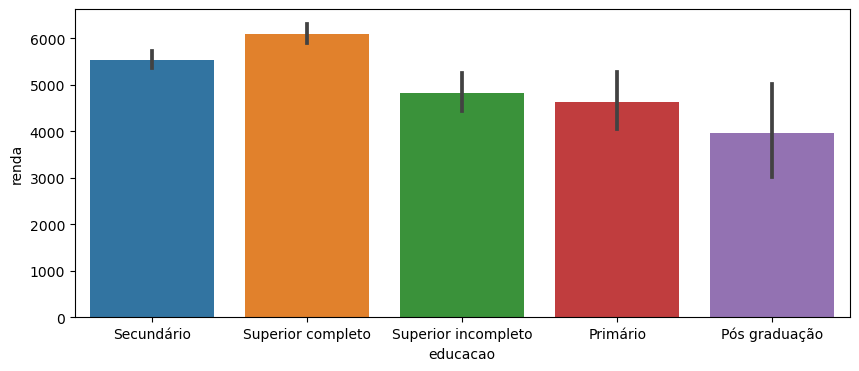

In [4]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x='educacao'
            ,y='renda'
            ,data=dados
            ,ax=ax)

#### Tipo de Residência x Renda

É notável que pessoas que moram em estúdios possuem uma média de renda superior, mesmo havendo uma variabilidade alta também.

<Axes: xlabel='tipo_residencia', ylabel='renda'>

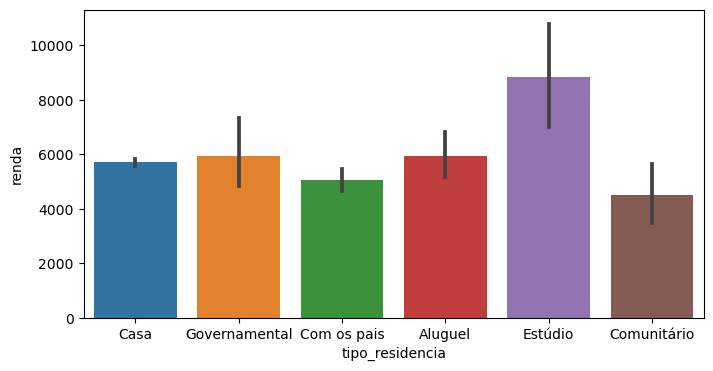

In [5]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='tipo_residencia'
            ,y='renda'
            ,data=dados
            ,ax=ax)

#### Quanridade de Pessoas na Residência x Renda

Este fator não aparenta ter grande significância para a renda, isso até residências com até 7 moradores.

<Axes: xlabel='qt_pessoas_residencia', ylabel='renda'>

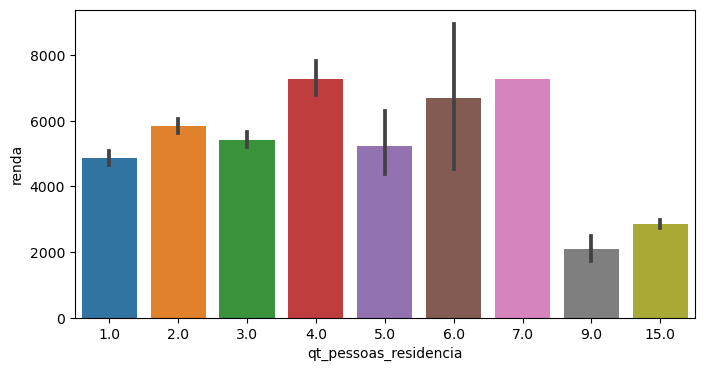

In [6]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='qt_pessoas_residencia'
            ,y='renda'
            ,data=dados
            ,ax=ax)

#### Tipo de Renda x Renda

O tipo de renda oferece informações interessantes sobre a quantidade de renda. Servidores públicos tem a melhor média.

<Axes: xlabel='tipo_renda', ylabel='renda'>

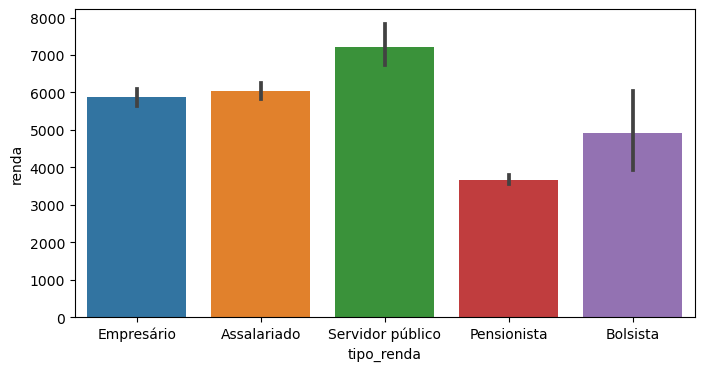

In [7]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='tipo_renda'
            ,y='renda'
            ,data=dados
            ,ax=ax)

#### Posse de Imóvel x Renda

Possuir ou não um imóvel é irrelevante para definir a renda.

<Axes: xlabel='posse_de_imovel', ylabel='renda'>

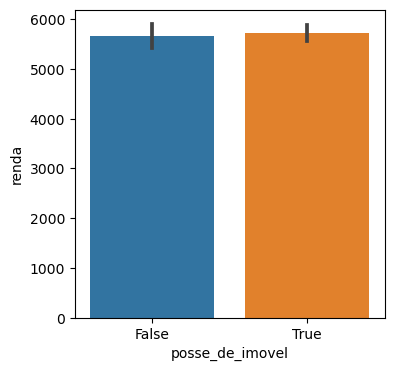

In [8]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(x='posse_de_imovel'
            ,y='renda'
            ,data=dados
            ,ax=ax)

#### Posse de Veículo x Renda

Pessoas com veículos possuem rendas significativamente superiores.

<Axes: xlabel='posse_de_veiculo', ylabel='renda'>

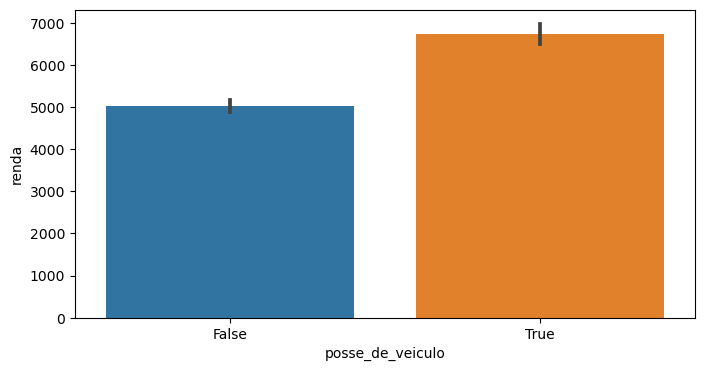

In [9]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='posse_de_veiculo'
            ,y='renda'
            ,data=dados
            ,ax=ax)

## Etapa 3 Crisp-DM: Preparação dos dados
> Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



**Verificando os tipos de dados que possuimos:**

In [10]:
dados.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


> Após análise, decidi remover algumas colunas que não possuem dados relevantes para previsão da renda.

In [5]:
dados = dados.drop(columns = ['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1)

In [6]:
dados.head(1)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


**Verificando dados ausentes:**

In [13]:
dados.isna().sum()

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

> Possuímos dados ausentes na coluna 'tempo_emprego'. Para evitar a perda dessas linhas, optei por investigar e descobrir qual o tipo de renda nelas.

In [7]:
nulos = dados[dados.tempo_emprego.isnull()]

In [8]:
nulos.tipo_renda.value_counts()

tipo_renda
Pensionista    2573
Name: count, dtype: int64

> Todos os clientes que possuem dados ausentes são pensionistas. Irei verificar se todos desta coluna apresentam a mesma característica.

In [9]:
linhas_pensionistas = dados[dados.tipo_renda == 'Pensionista']

In [10]:
tempo_emprego_pensionistas = linhas_pensionistas.tempo_emprego[linhas_pensionistas.tempo_emprego.notnull()]
tempo_emprego_pensionistas

2538      7.520548
2707      6.049315
3717     10.082192
4747     10.082192
5762      3.630137
6519      7.520548
8748      1.605479
12635    10.082192
14982     7.520548
Name: tempo_emprego, dtype: float64

> Alguns pensionistas apresentam a informação de tempo de emprego. Para não perder linhas preciosas, irei optar por preencher os dados ausentes na coluna 'tempo_emprego' pela média de contribuição dos pensionistas que possuem essa variável.

In [11]:
media_tempo_emprego_pensionistas = np.mean(tempo_emprego_pensionistas)

In [12]:
media_tempo_emprego_pensionistas

7.121461187214613

In [13]:
dados = dados.fillna(media_tempo_emprego_pensionistas)

In [14]:
dados.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

**Verificando e removendo dados duplicados:**

In [15]:
dados.duplicated().value_counts()

False    10447
True      4553
Name: count, dtype: int64

In [16]:
dados = dados.drop_duplicates()

**Exportando dados**

In [17]:
dados.to_csv('dados_tratados.csv')

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Para este projeto, decidi utilizar o método Modelo de Regressão.

### Modelagem

#### Criando base de treino e teste

> Para isso, irei separar a base de dados em duas partes, uma para treino e outra para testes. Utilizarei a proporção de 75% dos dados para treino e 25% para teste.

In [24]:
dados_train = dados.sample(frac=0.75, random_state=1)
dados_test = dados.drop(dados_train.index)

### Rodando o modelo


> Aqui será feita a seleção das colunas e o treinamento do Modelo de Regressão. Para atestar a qualidade dele, serão observados os valores de R-quadrado, R-quadrado Ajustado, AIC e os P-Values das variáveis.

In [25]:
#Seleção das colunas.
lista_dados = 'renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'

In [26]:
modelo = smf.ols(lista_dados, data= dados_train).fit()

In [27]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     117.1
Date:                Mon, 18 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:09:22   Log-Likelihood:                -80300.
No. Observations:                7835   AIC:                         1.606e+05
Df Residuals:                    7810   BIC:                         1.608e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -3390.4054   3066.907     -1.105      0.269   -9402.364    2621.553
sexo[T.M]                         5896.1449    182.841     32.247      0.000    5537.728    6254.562
posse_de_veiculo[T.True]          -115.7519    174.010     -0.665      0.506    -456.858     225.354
posse_de_imovel[T.True]            577.2270    170.608      3.383      0.001     242.790     911.665
tipo_renda[T.Bolsista]           -1452.3494   2803.181     -0.518      0.604   -6947.335    4042.636
tipo_renda[T.Empresário]           951.0221    197.261      4.821      0.000     564.337    1337.707
tipo_renda[T.Pensionista]        -1021.2723    279.857     -3.649      0.000   -1569.866    -472.678
tipo_renda[T.Servidor público]     304.0238    293.218      1.037      0.300    -270.761     878.809
educacao[T.Pós graduação]          844.0748   2207.497      0.382      0.702   -3483.211    5171.360
educacao[T.Secundário]             448.9833    776.727      0.578      0.563   -1073.609    1971.576
educacao[T.Superior completo]     1131.7162    781.996      1.447      0.148    -401.206    2664.638
educacao[T.Superior incompleto]     39.4829    872.288      0.045      0.964   -1670.435    1749.401
estado_civil[T.Separado]           240.2921   1466.359      0.164      0.870   -2634.165    3114.749
estado_civil[T.Solteiro]             2.8248   1441.457      0.002      0.998   -2822.817    2828.467
estado_civil[T.União]             -475.1902    296.300     -1.604      0.109   -1056.018     105.638
estado_civil[T.Viúvo]              324.9185   1483.152      0.219      0.827   -2582.457    3232.294
tipo_residencia[T.Casa]           -316.3477    700.887     -0.451      0.652   -1690.273    1057.578
tipo_residencia[T.Com os pais]     -97.4680    783.220     -0.124      0.901   -1632.789    1437.853
tipo_residencia[T.Comunitário]       8.8598   1497.231      0.006      0.995   -2926.113    2943.833
tipo_residencia[T.Estúdio]         607.4372   1194.259      0.509      0.611   -1733.630    2948.504
tipo_residencia[T.Governamental]   -78.0028    829.593     -0.094      0.925   -1704.227    1548.221
qtd_filhos                        -346.6562   1433.275     -0.242      0.809   -3156.258    2462.946
idade                               35.3571     10.084      3.506      0.000      15.591      55.124
tempo_emprego                      521.8233     13.484     38.700      0.000     495.392     548.255
qt_pessoas_residencia              420.0696   1430.428      0.294      0.769   -2383.953    3224.092
==============================================================================
Omnibus:                    10558.859   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4301333.599
Skew:             

> Este primeiro modelo apresenta muita margem para melhoria. Será feita a remoção de algumas colunas estatisticamente irrelevantes, categorização da 'tipo_renda' e a transformação da variável resposta em Log.

In [28]:
lista_dados = 'np.log(renda) ~ sexo + posse_de_imovel + C(tipo_renda, Treatment(3)) + idade + tempo_emprego'
modelo = smf.ols(lista_dados, data= dados_train).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     513.7
Date:                Mon, 18 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:09:22   Log-Likelihood:                -8473.0
No. Observations:                7835   AIC:                         1.696e+04
Df Residuals:                    7826   BIC:                         1.703e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                           7.0411      0.060    117.496      0.000       6.924       7.159
sexo[T.M]                                           0.8206      0.018     46.161      0.000       0.786       0.855
posse_de_imovel[T.True]                             0.1029      0.017      5.922      0.000       0.069       0.137
C(tipo_renda, Treatment(3))[T.Assalariado]          0.1524      0.029      5.260      0.000       0.096       0.209
C(tipo_renda, Treatment(3))[T.Bolsista]             0.4042      0.292      1.382      0.167      -0.169       0.977
C(tipo_renda, Treatment(3))[T.Empresário]           0.3084      0.032      9.668      0.000       0.246       0.371
C(tipo_renda, Treatment(3))[T.Servidor público]     0.2297      0.039      5.877      0.000       0.153       0.306
idade                                               0.0046      0.001      4.658      0.000       0.003       0.006
tempo_emprego                                       0.0601      0.001     42.923      0.000       0.057       0.063
==============================================================================
Omnibus:                        2.312   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                2.353
Skew:                           0.012   Prob(JB):                        0.308
Kurtosis:                       3.082   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> Após alguns testes, foi possível melhorar o modelo até atingir o resultado acima. Podemos agora avançar para os próximos passos.

<Axes: xlabel='renda'>

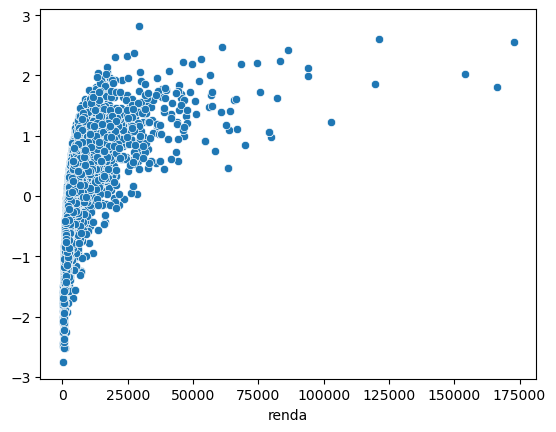

In [29]:
sns.scatterplot(x = dados_train.renda, y = modelo.resid)

**Análise dos valores preditos:**

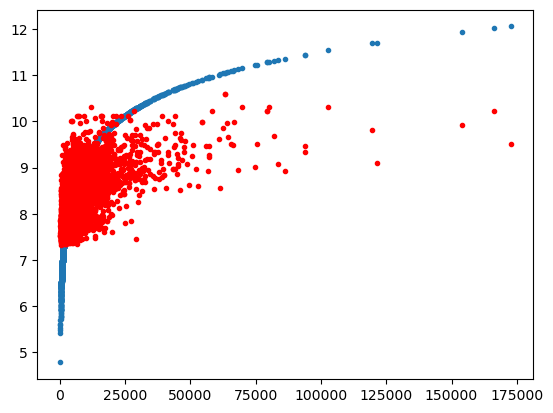

In [30]:
dados_train['pred_log'] = modelo.fittedvalues
dados_train['renda_log'] = np.log(dados_train.renda)

plt.plot(dados_train.renda, dados_train.renda_log, '.')
plt.plot(dados_train.renda, dados_train.pred_log, 'r.')


## Etapa 5 Crisp-DM: Avaliação dos resultados


O modelo foi ajustado e agora pode ajudar a prever a renda de novos indivíduos da base de dados. Foi possível alcançar uma precisão aceitável, agora o modelo pode ser implementado e ser melhorado com o tempo.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementanto ele em um motor que toma as decisões com algum nível de automação.